In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_identity.csv', 'test_identity.csv', 'test_transaction.csv', 'sample_submission.csv', 'train_transaction.csv']


In [2]:
train_identity_data = pd.read_csv('../input/train_identity.csv')
train_transaction_data = pd.read_csv('../input/train_transaction.csv')

In [3]:
pd.set_option('display.max_columns', 500)
train_transaction_data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
train_identity_data.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
# https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature
train_transaction_data['Transaction_dow'] = np.floor((train_transaction_data['TransactionDT'] / (3600 * 24) - 1) % 7)
train_transaction_data['Transaction_hour'] = np.floor(train_transaction_data['TransactionDT'] / 3600) % 24

In [6]:
na_columns = train_identity_data.isna().sum()
print(na_columns[na_columns==0])

TransactionID    0
id_01            0
id_12            0
dtype: int64


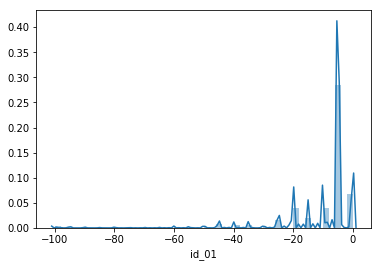

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train_identity_data['id_01'])

In [8]:
# number of nan values in each column
pd.set_option('display.max_rows', 500)
na_columns = train_transaction_data.isna().sum()
print(na_columns[na_columns==0])
transaction_data_columns = train_transaction_data.columns
numericCols = train_transaction_data._get_numeric_data().columns

TransactionID       0
isFraud             0
TransactionDT       0
TransactionAmt      0
ProductCD           0
card1               0
C1                  0
C2                  0
C3                  0
C4                  0
C5                  0
C6                  0
C7                  0
C8                  0
C9                  0
C10                 0
C11                 0
C12                 0
C13                 0
C14                 0
Transaction_dow     0
Transaction_hour    0
dtype: int64


In [9]:
categoricalCols = list(set(transaction_data_columns) - set(numericCols))
print('The categorical columns in transaction data are: ',categoricalCols)

The categorical columns in transaction data are:  ['M5', 'M2', 'M8', 'M9', 'M6', 'ProductCD', 'P_emaildomain', 'card6', 'M4', 'M1', 'card4', 'M3', 'M7', 'R_emaildomain']


In [10]:
train_transaction_data[categoricalCols] = train_transaction_data[categoricalCols].replace({ np.nan:'missing'})
train_transaction_data[numericCols] = train_transaction_data[numericCols].replace({ np.nan:-1})

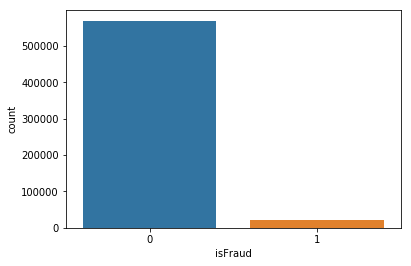

In [11]:
sns.countplot(train_transaction_data['isFraud'])

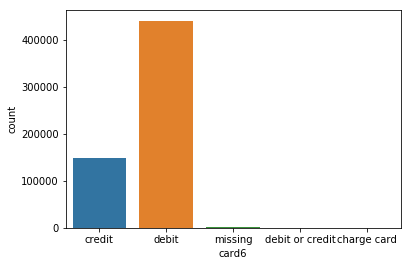

In [12]:
sns.countplot(train_transaction_data['card6'])

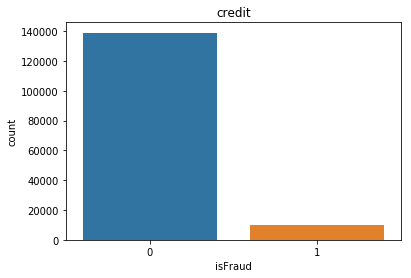

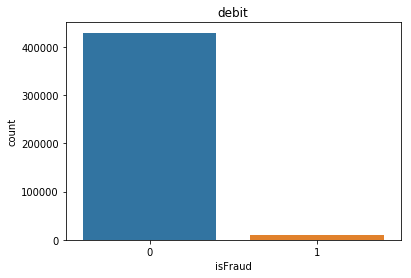

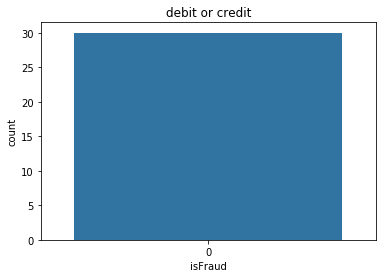

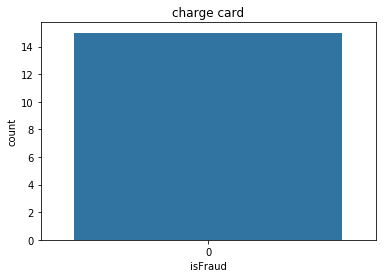

In [13]:
cardTypes = ['credit','debit','debit or credit','charge card']
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_transaction_data.loc[train_transaction_data["card6"]=="'+i_card+'"]')
    plt.figure(i)
    sns.countplot(cardData['isFraud']).set_title(i_card)

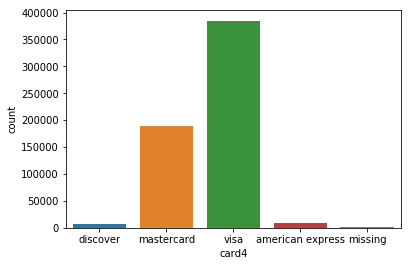

In [14]:
sns.countplot(train_transaction_data['card4'])

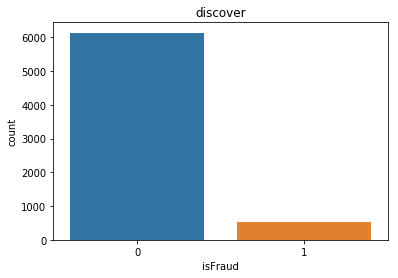

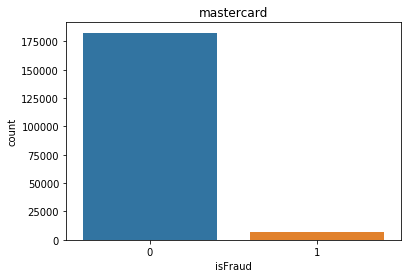

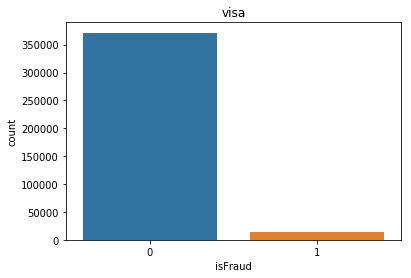

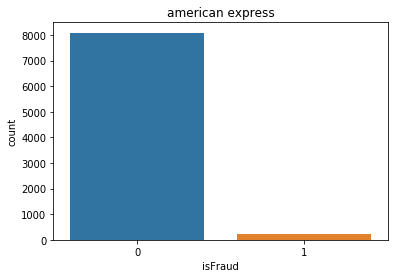

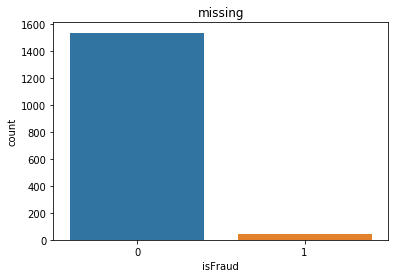

In [15]:
cardTypes = ['discover','mastercard','visa','american express','missing']
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_transaction_data.loc[train_transaction_data["card4"]=="'+i_card+'"]')
    plt.figure(i)
    sns.countplot(cardData['isFraud']).set_title(i_card)

In [16]:
print('The average transaction amount for non fraudulent transactions is: ', 
      np.mean(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The average transaction amount for fraudulent transactions is: ', 
      np.mean(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The average transaction amount for non fraudulent transactions is:  134.51166457896034
The average transaction amount for fraudulent transactions is:  149.2447785897534


In [17]:
print('The Maximum transaction amount for non fraudulent transactions is: ', 
      np.max(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The Maximum transaction amount for fraudulent transactions is: ', 
      np.max(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The Maximum transaction amount for non fraudulent transactions is:  31937.391
The Maximum transaction amount for fraudulent transactions is:  5191.0


In [18]:
print('The Minimum transaction amount for non fraudulent transactions is: ', 
      np.min(train_transaction_data.loc[train_transaction_data["isFraud"]==0]['TransactionAmt']))
print('The Minimum transaction amount for fraudulent transactions is: ', 
      np.min(train_transaction_data.loc[train_transaction_data["isFraud"]==1]['TransactionAmt']))

The Minimum transaction amount for non fraudulent transactions is:  0.251
The Minimum transaction amount for fraudulent transactions is:  0.292


In [19]:
maxCardData = {}
minCardData = {}
meanCardData = {}
for i,i_card in enumerate(cardTypes):
    cardData = eval('train_transaction_data.loc[train_transaction_data["card4"]=="'+i_card+'"]')
    maxCardData[i_card] = np.max(cardData['TransactionAmt'])
    minCardData[i_card] = np.min(cardData['TransactionAmt'])
    meanCardData[i_card] = np.mean(cardData['TransactionAmt'])

In [20]:
print('The maximum transactions by card are:', maxCardData)
print('The minimum transactions by card are:', minCardData)
print('The average transactions by card are:', meanCardData)

The maximum transactions by card are: {'discover': 4817.58, 'mastercard': 31937.391, 'visa': 6450.97, 'american express': 1800.0, 'missing': 4545.36}
The minimum transactions by card are: {'discover': 5.0, 'mastercard': 0.272, 'visa': 0.251, 'american express': 5.0, 'missing': 2.6}
The average transactions by card are: {'discover': 265.75042549991866, 'mastercard': 132.38773137177253, 'visa': 133.16180560725275, 'american express': 173.05713664745434, 'missing': 154.68928091312833}


In [21]:
normalDataTransaction = train_transaction_data.loc[train_transaction_data["isFraud"]==0]
normalDataTransaction.TransactionAmt.describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [22]:
fraudDataTransaction = train_transaction_data.loc[train_transaction_data["isFraud"]==1]
fraudDataTransaction.TransactionAmt.describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

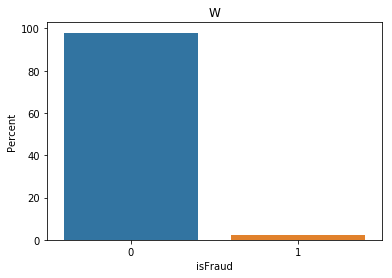

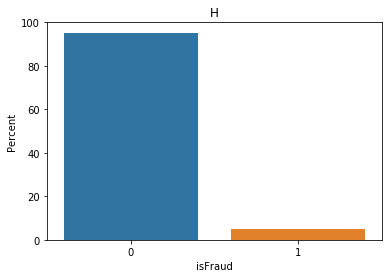

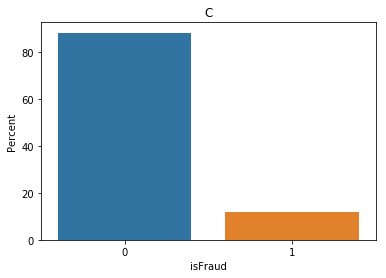

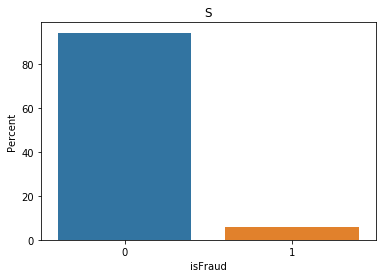

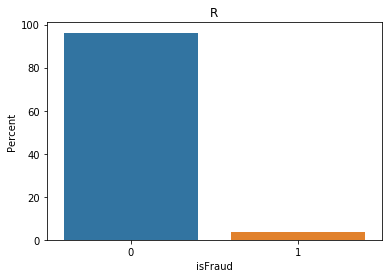

In [23]:
prodTypes = train_transaction_data['ProductCD'].unique()
for i,i_prod in enumerate(prodTypes):
    productData = eval('train_transaction_data.loc[train_transaction_data["ProductCD"]=="'+i_prod+'"]')
    plt.figure(i)
    ax = sns.barplot(x="isFraud", y="isFraud", data=productData, estimator=lambda x: len(x) / len(productData) * 100)
    ax.set(ylabel="Percent")
    ax.set_title(i_prod)

In [24]:
del fraudDataTransaction,normalDataTransaction,productData,cardData

In [25]:
print(train_identity_data.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [26]:
identity_data_columns = train_identity_data.columns
numericCols = train_identity_data._get_numeric_data().columns
categoricalCols = list(set(identity_data_columns) - set(numericCols))
print('The categorical columns in identity data are: ',categoricalCols)
train_identity_data[categoricalCols] = train_identity_data[categoricalCols].replace({ np.nan:'missing'})
train_identity_data[numericCols] = train_identity_data[numericCols].replace({ np.nan:-1})

The categorical columns in identity data are:  ['DeviceInfo', 'id_36', 'id_35', 'id_12', 'id_28', 'id_31', 'id_34', 'id_23', 'id_33', 'id_29', 'id_15', 'id_27', 'id_38', 'id_16', 'id_30', 'DeviceType', 'id_37']


In [27]:
np.unique(train_identity_data['id_30'])

array(['Android', 'Android 4.4.2', 'Android 5.0', 'Android 5.0.2',
       'Android 5.1.1', 'Android 6.0', 'Android 6.0.1', 'Android 7.0',
       'Android 7.1.1', 'Android 7.1.2', 'Android 8.0.0', 'Android 8.1.0',
       'Linux', 'Mac', 'Mac OS X 10.10', 'Mac OS X 10.11',
       'Mac OS X 10.12', 'Mac OS X 10.13', 'Mac OS X 10.6',
       'Mac OS X 10.9', 'Mac OS X 10_10_5', 'Mac OS X 10_11_3',
       'Mac OS X 10_11_4', 'Mac OS X 10_11_5', 'Mac OS X 10_11_6',
       'Mac OS X 10_12', 'Mac OS X 10_12_1', 'Mac OS X 10_12_2',
       'Mac OS X 10_12_3', 'Mac OS X 10_12_4', 'Mac OS X 10_12_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'Mac OS X 10_13_2',
       'Mac OS X 10_13_3', 'Mac OS X 10_13_4', 'Mac OS X 10_13_5',
       'Mac OS X 10_6_8', 'Mac OS X 10_7_5', 'Mac OS X 10_8_5',
       'Mac OS X 10_9_5', 'Windows', 'Windows 10', 'Windows 7',
       'Windows 8', 'Windows 8.1', 'Windows Vista', 'Windows XP', 'func',
       'iOS', 'iOS 10.0.2', 'iOS 10.1.1', 'iOS 10.2.0', 'iOS 10.2.1',

In [28]:
#collapse os types - id_30
train_identity_data.loc[train_identity_data['id_30'].str.contains('Mac', na=False), 'id_30'] = 'mac'
train_identity_data.loc[train_identity_data['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
train_identity_data.loc[train_identity_data['id_30'].str.contains('Android', na=False), 'id_30'] = 'android'
train_identity_data.loc[train_identity_data['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
train_identity_data.loc[train_identity_data['id_30'].str.contains('Linux', na=False), 'id_30'] = 'Linux'

In [29]:
train_identity_data['device_name'] = train_identity_data['DeviceInfo'].str.split('/', expand=True)[0]

train_identity_data.loc[train_identity_data['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
train_identity_data.loc[train_identity_data['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
train_identity_data.loc[train_identity_data['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
train_identity_data.loc[train_identity_data['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
train_identity_data.loc[train_identity_data['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
train_identity_data.loc[train_identity_data['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
train_identity_data.loc[train_identity_data['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
train_identity_data.loc[train_identity_data['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
train_identity_data.loc[train_identity_data['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
train_identity_data.loc[train_identity_data['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
train_identity_data.loc[train_identity_data['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
train_identity_data.loc[train_identity_data['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
train_identity_data.loc[train_identity_data['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
train_identity_data.loc[train_identity_data['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
train_identity_data.loc[train_identity_data['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
train_identity_data.loc[train_identity_data['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
train_identity_data.loc[train_identity_data['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

train_identity_data.loc[train_identity_data.device_name.isin(train_identity_data.device_name.value_counts()[train_identity_data.device_name.value_counts() < 200].index), 'device_name'] = "Others"

In [30]:
np.unique(train_identity_data['id_30'])

array(['Linux', 'Windows', 'android', 'func', 'iOS', 'mac', 'missing',
       'other'], dtype=object)

In [31]:
print(np.unique(train_identity_data['id_31']))
train_identity_data['id_31'] = train_identity_data['id_31'].str.replace('\d+', '')
print(np.unique(train_identity_data['id_31']))

['BLU/Dash' 'Cherry' 'Generic/Android' 'Generic/Android 7.0' 'Inco/Minion'
 'LG/K-200' 'Lanix/Ilium' 'M4Tel/M4' 'Microsoft/Windows' 'Mozilla/Firefox'
 'Nokia/Lumia' 'Samsung/SCH' 'Samsung/SM-G531H' 'Samsung/SM-G532M'
 'ZTE/Blade' 'android' 'android browser 4.0' 'android webview 4.0' 'aol'
 'chrome' 'chrome 43.0 for android' 'chrome 46.0 for android'
 'chrome 49.0' 'chrome 49.0 for android' 'chrome 50.0 for android'
 'chrome 51.0' 'chrome 51.0 for android' 'chrome 52.0 for android'
 'chrome 53.0 for android' 'chrome 54.0 for android' 'chrome 55.0'
 'chrome 55.0 for android' 'chrome 56.0' 'chrome 56.0 for android'
 'chrome 57.0' 'chrome 57.0 for android' 'chrome 58.0'
 'chrome 58.0 for android' 'chrome 59.0' 'chrome 59.0 for android'
 'chrome 60.0' 'chrome 60.0 for android' 'chrome 61.0'
 'chrome 61.0 for android' 'chrome 62.0' 'chrome 62.0 for android'
 'chrome 62.0 for ios' 'chrome 63.0' 'chrome 63.0 for android'
 'chrome 63.0 for ios' 'chrome 64.0' 'chrome 64.0 for android'
 'chrome 6

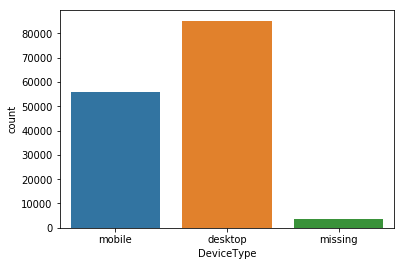

In [32]:
sns.countplot(train_identity_data['DeviceType'])

In [33]:
raw_train_data = pd.merge(train_transaction_data, train_identity_data, on='TransactionID', how='left')

In [34]:
del train_transaction_data,train_identity_data

In [35]:
raw_train_data_columns = raw_train_data.columns
numericCols = raw_train_data._get_numeric_data().columns
categoricalCols = list(set(raw_train_data_columns) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
raw_train_data[categoricalCols] = raw_train_data[categoricalCols].replace({ np.nan:'missing'})
raw_train_data[numericCols] = raw_train_data[numericCols].replace({ np.nan:-1})

The categorical columns in training data are:  ['device_name', 'id_29', 'id_33', 'id_27', 'M1', 'card4', 'M3', 'id_31', 'id_38', 'id_30', 'id_37', 'R_emaildomain', 'M7', 'DeviceInfo', 'M5', 'M8', 'id_34', 'id_23', 'card6', 'id_16', 'M6', 'DeviceType', 'id_36', 'id_35', 'M2', 'id_28', 'id_12', 'M9', 'ProductCD', 'P_emaildomain', 'id_15', 'M4']


In [36]:
print(raw_train_data.head(10))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   
5        2987005        0          86510            49.0         W   5937   
6        2987006        0          86522           159.0         W  12308   
7        2987007        0          86529           422.5         W  12695   
8        2987008        0          86535            15.0         H   2803   
9        2987009        0          86536           117.0         W  17399   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0   -1.0  150.0    discover  142.0  credit  315.0   87.0   19.0   -1.0   
1  4

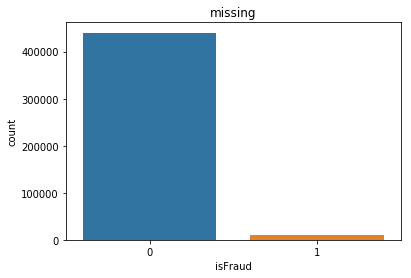

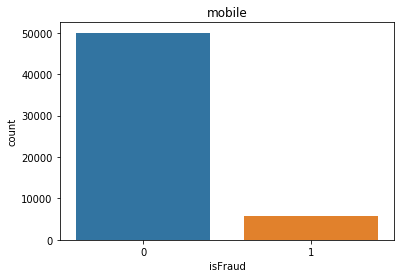

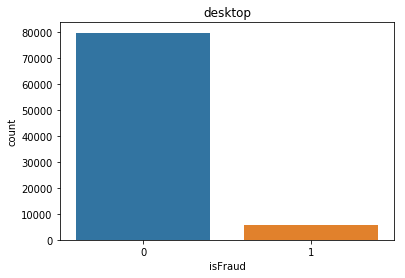

In [37]:
deviceTypes = raw_train_data['DeviceType'].unique()
for i,i_device in enumerate(deviceTypes):
    deviceData = eval('raw_train_data.loc[raw_train_data["DeviceType"]=="'+i_device+'"]')
    plt.figure(i)
    sns.countplot(deviceData['isFraud']).set_title(i_device)

looks like merging the two data tables has created a lot of missing values. let us first try to identify good features from these.

In [38]:
variables = list(numericCols)
variables.remove('isFraud')

In [39]:
correlationMatrix = raw_train_data.loc[:, variables].corr().abs()
#correlationMatrix = raw_train_data.loc[:, variables].corr()

Text(0.5, 1.0, 'Heatmap of Correlation')

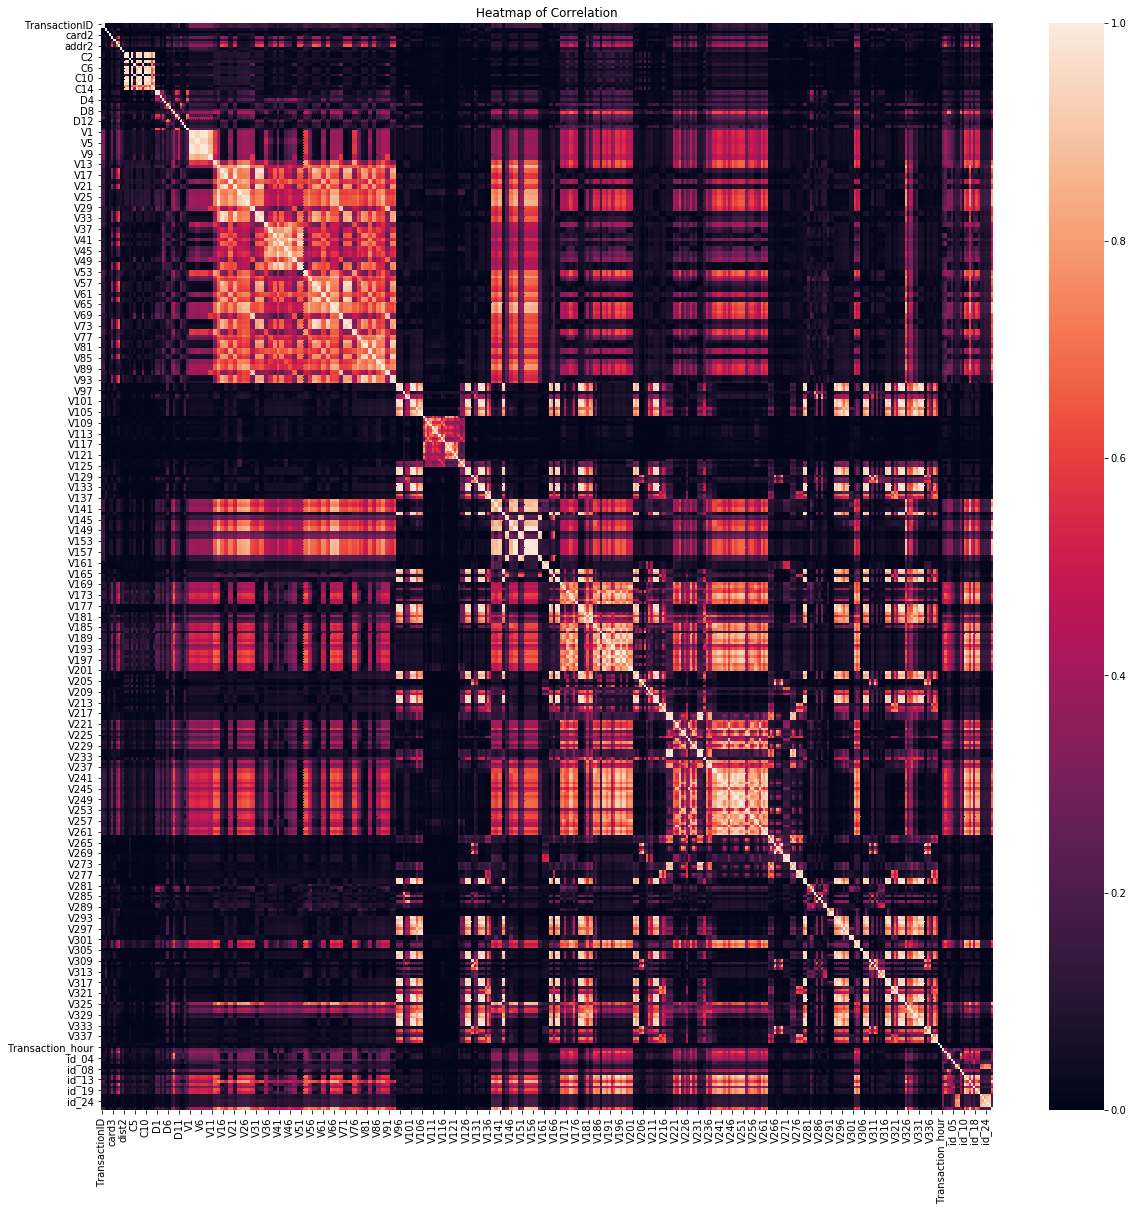

In [40]:
plt.figure(figsize=(20,20))
heat = sns.heatmap(data=correlationMatrix)
plt.title('Heatmap of Correlation')

In [41]:
na_vals = np.sum(raw_train_data.loc[:,variables]==-1)/raw_train_data.shape[0]
goodNumericVars = []
for i_var in variables:    
    if na_vals[i_var] < 0.85:        
        goodNumericVars.append(i_var)
goodNumericVars.remove('TransactionDT')
goodNumericVars.remove('TransactionID')

In [42]:
corrThresh = 0.9
# Select upper triangle of correlation matrix
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > corrThresh)]

In [43]:
to_drop.remove('TransactionDT')

In [44]:
for i_var in to_drop:
    if i_var in goodNumericVars:
        goodNumericVars.remove(i_var)

Now that we have identified good numeric variables, let us use just the missing data as benchmark for the categorical variables

In [45]:
del to_drop,corrThresh,upper,correlationMatrix,na_vals

In [46]:
variables = list(categoricalCols)
na_vals = np.sum(raw_train_data.loc[:,variables]=='missing')/raw_train_data.shape[0]
goodCategoricalVars = []
for i_var in variables:    
    if na_vals[i_var] < 0.85:        
        goodCategoricalVars.append(i_var)

In [47]:
featuresToUse = goodNumericVars+goodCategoricalVars
train_data = raw_train_data.loc[:,featuresToUse]
target_data = raw_train_data['isFraud']

In [48]:
featuresToUse

['TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'C1',
 'C3',
 'C5',
 'C13',
 'D1',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'V1',
 'V10',
 'V12',
 'V14',
 'V15',
 'V19',
 'V29',
 'V35',
 'V37',
 'V39',
 'V41',
 'V48',
 'V53',
 'V55',
 'V56',
 'V61',
 'V75',
 'V77',
 'V78',
 'V79',
 'V80',
 'V82',
 'V86',
 'V88',
 'V95',
 'V98',
 'V99',
 'V100',
 'V104',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V129',
 'V130',
 'V131',
 'V135',
 'V136',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V175',
 'V176',
 'V180',
 'V181',
 'V184',
 'V187',
 'V188',
 'V192',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V214',
 'V215',
 'V217',
 'V220',
 'V221',
 'V223',
 'V224',
 'V226',
 'V227',
 'V228',
 'V229',
 'V234',
 'V235',
 'V236',
 'V263',
 'V264',
 'V267',
 'V268',
 'V270',
 'V276',
 'V277',
 'V281',
 'V282',
 'V283',
 'V284',
 'V

In [49]:
#https://www.kaggle.com/artgor/eda-and-models#Feature-engineering
train_data['TransactionAmt_to_mean_card1'] = train_data['TransactionAmt'] / train_data.groupby(['card1'])['TransactionAmt'].transform('mean')
train_data['TransactionAmt_to_mean_card4'] = train_data['TransactionAmt'] / train_data.groupby(['card4'])['TransactionAmt'].transform('mean')
train_data['TransactionAmt_to_mean_card5'] = train_data['TransactionAmt'] / train_data.groupby(['card5'])['TransactionAmt'].transform('mean')
train_data['TransactionAmt_to_mean_addr1'] = train_data['TransactionAmt'] / train_data.groupby(['addr1'])['TransactionAmt'].transform('mean')
train_data['TransactionAmt_to_mean_id31'] = train_data['TransactionAmt'] / train_data.groupby(['id_31'])['TransactionAmt'].transform('mean')
train_data['card1_card2'] = train_data['card1'].astype(str) + '_' + train_data['card2'].astype(str)
train_data['addr1_dist1'] = train_data['addr1'].astype(str) + '_' + train_data['dist1'].astype(str)
train_data['card1_addr1'] = train_data['card1'].astype(str) + '_' + train_data['addr1'].astype(str)
train_data['card1_addr2'] = train_data['card1'].astype(str) + '_' + train_data['addr2'].astype(str)
train_data['card2_addr1'] = train_data['card2'].astype(str) + '_' + train_data['addr1'].astype(str)
train_data['card2_addr2'] = train_data['card2'].astype(str) + '_' + train_data['addr2'].astype(str)
train_data['card4_addr1'] = train_data['card4'].astype(str) + '_' + train_data['addr1'].astype(str)
train_data['card4_addr2'] = train_data['card4'].astype(str) + '_' + train_data['addr2'].astype(str)
train_data['DeviceInfo_P_emaildomain'] = train_data['DeviceInfo'].astype(str) + '_' + train_data['P_emaildomain'].astype(str)
train_data['P_emaildomain_addr1'] = train_data['P_emaildomain'].astype(str) + '_' + train_data['addr1'].astype(str)
train_data['id01_addr1'] = train_data['id_01'].astype(str) + '_' + train_data['addr1'].astype(str)
train_data['TransactionAmt_to_std_card1'] = train_data['TransactionAmt'] / train_data.groupby(['card1'])['TransactionAmt'].transform('std')
train_data['TransactionAmt_to_std_card4'] = train_data['TransactionAmt'] / train_data.groupby(['card4'])['TransactionAmt'].transform('std')
train_data['TransactionAmt_to_std_card5'] = train_data['TransactionAmt'] / train_data.groupby(['card5'])['TransactionAmt'].transform('std')
train_data['TransactionAmt_to_std_addr1'] = train_data['TransactionAmt'] / train_data.groupby(['addr1'])['TransactionAmt'].transform('std')
train_data['TransactionAmt_to_std_id31'] = train_data['TransactionAmt'] / train_data.groupby(['id_31'])['TransactionAmt'].transform('std')
train_data['TransactionAmt_decimal'] = ((train_data['TransactionAmt'] - train_data['TransactionAmt'].astype(int)) * 1000).astype(int)

In [50]:
scale_pos_weight = np.sqrt(len(target_data.loc[target_data==0])/len(target_data.loc[target_data==1]))

In [51]:
del raw_train_data

In [52]:
test_identity_data = pd.read_csv('../input/test_identity.csv')
test_transaction_data = pd.read_csv('../input/test_transaction.csv')

In [53]:
# https://www.kaggle.com/fchmiel/day-and-time-powerful-predictive-feature
test_transaction_data['Transaction_dow'] = np.floor((test_transaction_data['TransactionDT'] / (3600 * 24) - 1) % 7)
test_transaction_data['Transaction_hour'] = np.floor(test_transaction_data['TransactionDT'] / 3600) % 24
transaction_data_columns = test_transaction_data.columns
numericCols = test_transaction_data._get_numeric_data().columns
categoricalCols = list(set(transaction_data_columns) - set(numericCols))
test_transaction_data[categoricalCols] = test_transaction_data[categoricalCols].replace({ np.nan:'missing'})
test_transaction_data[numericCols] = test_transaction_data[numericCols].replace({ np.nan:-1})

In [54]:
identity_data_columns = test_identity_data.columns
numericCols = test_identity_data._get_numeric_data().columns
categoricalCols = list(set(identity_data_columns) - set(numericCols))
test_identity_data[categoricalCols] = test_identity_data[categoricalCols].replace({ np.nan:'missing'})
test_identity_data[numericCols] = test_identity_data[numericCols].replace({ np.nan:-1})
test_identity_data['id_31'] = test_identity_data['id_31'].str.replace('\d+', '')

test_identity_data.loc[test_identity_data['id_30'].str.contains('Mac', na=False), 'id_30'] = 'mac'
test_identity_data.loc[test_identity_data['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
test_identity_data.loc[test_identity_data['id_30'].str.contains('Android', na=False), 'id_30'] = 'android'
test_identity_data.loc[test_identity_data['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
test_identity_data.loc[test_identity_data['id_30'].str.contains('Linux', na=False), 'id_30'] = 'Linux'

In [55]:
test_identity_data['device_name'] = test_identity_data['DeviceInfo'].str.split('/', expand=True)[0]

test_identity_data.loc[test_identity_data['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
test_identity_data.loc[test_identity_data['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
test_identity_data.loc[test_identity_data['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
test_identity_data.loc[test_identity_data['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
test_identity_data.loc[test_identity_data['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
test_identity_data.loc[test_identity_data['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
test_identity_data.loc[test_identity_data['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
test_identity_data.loc[test_identity_data['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
test_identity_data.loc[test_identity_data['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
test_identity_data.loc[test_identity_data['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
test_identity_data.loc[test_identity_data['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
test_identity_data.loc[test_identity_data['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
test_identity_data.loc[test_identity_data['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
test_identity_data.loc[test_identity_data['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
test_identity_data.loc[test_identity_data['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
test_identity_data.loc[test_identity_data['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
test_identity_data.loc[test_identity_data['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

test_identity_data.loc[test_identity_data.device_name.isin(test_identity_data.device_name.value_counts()[test_identity_data.device_name.value_counts() < 200].index), 'device_name'] = "Others"

In [56]:
raw_test_data = pd.merge(test_transaction_data, test_identity_data, on='TransactionID', how='left')
transactionID = raw_test_data.loc[:,'TransactionID']
del test_identity_data,test_transaction_data

In [57]:
raw_test_data_columns = raw_test_data.columns
numericCols = raw_test_data._get_numeric_data().columns
categoricalCols = list(set(raw_test_data_columns) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
raw_test_data[categoricalCols] = raw_test_data[categoricalCols].replace({ np.nan:'missing'})
raw_test_data[numericCols] = raw_test_data[numericCols].replace({ np.nan:-1})

The categorical columns in training data are:  ['device_name', 'id_29', 'id_33', 'id_27', 'M1', 'card4', 'M3', 'id_31', 'id_38', 'id_30', 'id_37', 'R_emaildomain', 'M7', 'DeviceInfo', 'M5', 'M8', 'id_34', 'id_23', 'card6', 'id_16', 'M6', 'DeviceType', 'id_36', 'id_35', 'M2', 'id_28', 'id_12', 'M9', 'ProductCD', 'P_emaildomain', 'id_15', 'M4']


In [58]:
test_data = raw_test_data.loc[:,featuresToUse]
#https://www.kaggle.com/artgor/eda-and-models#Feature-engineering
test_data['TransactionAmt_to_mean_card1'] = test_data['TransactionAmt'] / test_data.groupby(['card1'])['TransactionAmt'].transform('mean')
test_data['TransactionAmt_to_mean_card4'] = test_data['TransactionAmt'] / test_data.groupby(['card4'])['TransactionAmt'].transform('mean')
test_data['TransactionAmt_to_mean_card5'] = test_data['TransactionAmt'] / test_data.groupby(['card5'])['TransactionAmt'].transform('mean')
test_data['TransactionAmt_to_mean_addr1'] = test_data['TransactionAmt'] / test_data.groupby(['addr1'])['TransactionAmt'].transform('mean')
test_data['TransactionAmt_to_mean_id31'] = test_data['TransactionAmt'] / test_data.groupby(['id_31'])['TransactionAmt'].transform('mean')
test_data['card1_card2'] = test_data['card1'].astype(str) + '_' + test_data['card2'].astype(str)
test_data['addr1_dist1'] = test_data['addr1'].astype(str) + '_' + test_data['dist1'].astype(str)
test_data['card1_addr1'] = test_data['card1'].astype(str) + '_' + test_data['addr1'].astype(str)
test_data['card1_addr2'] = test_data['card1'].astype(str) + '_' + test_data['addr2'].astype(str)
test_data['card2_addr1'] = test_data['card2'].astype(str) + '_' + test_data['addr1'].astype(str)
test_data['card2_addr2'] = test_data['card2'].astype(str) + '_' + test_data['addr2'].astype(str)
test_data['card4_addr1'] = test_data['card4'].astype(str) + '_' + test_data['addr1'].astype(str)
test_data['card4_addr2'] = test_data['card4'].astype(str) + '_' + test_data['addr2'].astype(str)
test_data['DeviceInfo_P_emaildomain'] = test_data['DeviceInfo'].astype(str) + '_' + test_data['P_emaildomain'].astype(str)
test_data['P_emaildomain_addr1'] = test_data['P_emaildomain'].astype(str) + '_' + test_data['addr1'].astype(str)
test_data['id01_addr1'] = test_data['id_01'].astype(str) + '_' + test_data['addr1'].astype(str)
test_data['TransactionAmt_to_std_card1'] = test_data['TransactionAmt'] / test_data.groupby(['card1'])['TransactionAmt'].transform('std')
test_data['TransactionAmt_to_std_card4'] = test_data['TransactionAmt'] / test_data.groupby(['card4'])['TransactionAmt'].transform('std')
test_data['TransactionAmt_to_std_card5'] = test_data['TransactionAmt'] / test_data.groupby(['card5'])['TransactionAmt'].transform('std')
test_data['TransactionAmt_to_std_addr1'] = test_data['TransactionAmt'] / test_data.groupby(['addr1'])['TransactionAmt'].transform('std')
test_data['TransactionAmt_to_std_id31'] = test_data['TransactionAmt'] / test_data.groupby(['id_31'])['TransactionAmt'].transform('std')
# New feature - decimal part of the transaction amount.
test_data['TransactionAmt_decimal'] = ((test_data['TransactionAmt'] - test_data['TransactionAmt'].astype(int)) * 1000).astype(int)

In [59]:
goodCategoricalVars.append('card1_addr1')
goodCategoricalVars.append('card1_addr2')
goodCategoricalVars.append('card2_addr1')
goodCategoricalVars.append('card2_addr2')
goodCategoricalVars.append('card4_addr1')
goodCategoricalVars.append('card4_addr2')
goodCategoricalVars.append('DeviceInfo_P_emaildomain')
goodCategoricalVars.append('P_emaildomain_addr1')
goodCategoricalVars.append('id01_addr1')
goodCategoricalVars.append('card1_card2')
goodCategoricalVars.append('device_name')
goodCategoricalVars.append('addr1_dist1')
from sklearn.preprocessing import LabelEncoder
for i_cat in goodCategoricalVars:
    le = LabelEncoder()
    curData = pd.concat([train_data.loc[:,i_cat],test_data.loc[:,i_cat]],axis = 0)
    le.fit(curData)
    train_data.loc[:,i_cat] = le.transform(train_data.loc[:,i_cat])   
    test_data.loc[:,i_cat] = le.transform(test_data.loc[:,i_cat])

In [60]:
del raw_test_data

In [61]:
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import roc_curve, auc
from lightgbm import LGBMClassifier
import lightgbm as lgb

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [62]:
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(train_data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(target_data.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

# Bounded region of parameter space
bounds_LGB = {
    'num_leaves': (31, 500), 
    'min_data_in_leaf': (20, 200),
    'bagging_fraction' : (0.1, 0.9),
    'feature_fraction' : (0.1, 0.9),
    #'learning_rate': (0.01, 0.3),
    'min_child_weight': (1, 4),   
    'reg_alpha': (0.2,2), 
    'reg_lambda': (0.2,2),
    'max_depth':(-1,50),
    'n_estimators':(750,1500)
}

train_ids = []
test_ids = []
for (train, test), i in zip(cv.split(train_data,target_data), range(5)):
    train_ids.append(train)
    test_ids.append(test)

from bayes_opt import BayesianOptimization
train, test = train_test_split(train_data, test_size=0.3, random_state=42,stratify = target_data)
train = train.index
test = test.index
def LGB_bayesian(num_leaves,bagging_fraction,feature_fraction,min_child_weight,
                 min_data_in_leaf,max_depth,n_estimators,reg_alpha,reg_lambda):
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    min_child_weight = int(min_child_weight)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int
    assert type(n_estimators) == int
    assert type(min_child_weight) == int
    param = {'num_leaves': num_leaves,'min_data_in_leaf': min_data_in_leaf,'min_child_weight': min_child_weight,'bagging_fraction' : bagging_fraction,
             'feature_fraction' : feature_fraction,'max_depth': max_depth,'reg_alpha': reg_alpha,'reg_lambda': reg_lambda,
              'objective': 'binary','boosting_type': 'gbdt','colsample_bytree':.8,'subsample':.9,'min_split_gain':.01,'max_bin':127,
             'bagging_freq':5,'learning_rate':0.1,'metric':'auc','n_estimators':n_estimators,'min_data_in_leaf':min_data_in_leaf} 
    lgb_bayes = LGBMClassifier(boosting = param['boosting_type'],n_estimators =  param['n_estimators'],
                     learning_rate =  param['learning_rate'],num_leaves =  param['num_leaves'],
                     colsample_bytree = param['colsample_bytree'],subsample =  param['subsample'],
                     max_depth =  param['max_depth'],reg_alpha =  param['reg_alpha'],
                     reg_lambda =  param['reg_lambda'],min_split_gain =  param['min_split_gain'],
                     min_child_weight =  param['min_child_weight'],max_bin =  param['max_bin'],
                     bagging_freq =  param['bagging_freq'],feature_fraction =  param['feature_fraction'],
                     bagging_fraction =  param['bagging_fraction'],min_data_in_leaf = param['min_data_in_leaf'])
    all_auc_val_score = []
    for i in range(cv.n_splits):
            lgb_bayes.fit(train_data.iloc[train_ids[i],:], target_data.iloc[train_ids[i]],eval_metric='auc')
            fpr, tpr, auc_score = compute_roc_auc(lgb_bayes,test_ids[i])
            all_auc_val_score.append(auc_score)
    #lgb_bayes.fit(train_data.iloc[train,:], target_data.iloc[train],eval_metric='auc')
    #fpr, tpr, auc_score = compute_roc_auc(lgb_bayes,test)
    return np.mean(all_auc_val_score)

lightGBM_bo = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=42)

print(lightGBM_bo.space.keys)
init_points = 10
n_iter = 15
print('-' * 130)

lightGBM_bo.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

print(lightGBM_bo.max['target'])
lightGBM_bo.max['params']

params = {
        'n_estimators': int(lightGBM_bo.max['params']['n_estimators']), 
        'num_leaves': int(lightGBM_bo.max['params']['num_leaves']), 
        'min_child_weight': lightGBM_bo.max['params']['min_child_weight'],
        'min_data_in_leaf': int(lightGBM_bo.max['params']['min_data_in_leaf']),
        'bagging_fraction': lightGBM_bo.max['params']['bagging_fraction'], 
        'feature_fraction': lightGBM_bo.max['params']['feature_fraction'],
        'reg_lambda': lightGBM_bo.max['params']['reg_lambda'],
        'reg_alpha': lightGBM_bo.max['params']['reg_alpha'],
        'max_depth': int(lightGBM_bo.max['params']['max_depth']), 
        'metric':'auc',
        'boosting_type': 'dart',
        'colsample_bytree':.8,'subsample':.9,
        'min_split_gain':.01,
        'max_bin':127,
        'bagging_freq':5,
        'learning_rate':0.1    
    }

In [63]:
params = {'bagging_fraction': 0.7982116702024386,
          'feature_fraction': 0.1785051643813966,
          'max_depth': int(49.17611603427576),
          'min_child_weight': 3.2852905549011155,
          'min_data_in_leaf': int(31.03480802715621),
          'n_estimators': int(1491.3676131788188),
          'num_leaves': int(52.851307790411965),
          'reg_alpha': 0.45963319421692145,
          'reg_lambda': 0.6591286807489907,
          'metric':'auc',
          'boosting_type': 'dart',
          'colsample_bytree':.8,
          'subsample':.9,
          'min_split_gain':.01,
          'max_bin':127,
          'bagging_freq':5,
          'learning_rate':0.1  ,
          'early_stopping_rounds':500
}

In [64]:
fprs_lgb, tprs_lgb, scores_lgb = [], [], []
feature_importances = pd.DataFrame()
feature_importances['feature'] = train_data.columns     
predictions = np.zeros(len(test_data))
for (train, test), i in zip(cv.split(train_data, target_data), range(5)):
    lgb_best = LGBMClassifier(boosting = params['boosting_type'],n_estimators =  params['n_estimators'],
                     learning_rate =  params['learning_rate'],num_leaves =  params['num_leaves'],
                     colsample_bytree = params['colsample_bytree'],subsample =  params['subsample'],
                     max_depth =  params['max_depth'],reg_alpha =  params['reg_alpha'],
                     reg_lambda =  params['reg_lambda'],min_split_gain =  params['min_split_gain'],
                     min_child_weight =  params['min_child_weight'],max_bin =  params['max_bin'],
                     bagging_freq =  params['bagging_freq'],feature_fraction =  params['feature_fraction'],
                     bagging_fraction =  params['bagging_fraction'],min_data_in_leaf = params['min_data_in_leaf'])
    lgb_best.fit(train_data.iloc[train,:], target_data.iloc[train],eval_metric='auc')
    feature_importances['fold_{}'.format(i + 1)] = lgb_best.feature_importances_
    _, _, auc_score_train = compute_roc_auc(lgb_best,train)
    fpr, tpr, auc_score = compute_roc_auc(lgb_best,test)
    scores_lgb.append((auc_score_train, auc_score))
    fprs_lgb.append(fpr)
    tprs_lgb.append(tpr) 
    predictions += lgb_best.predict_proba(test_data)[:,1]/cv.n_splits

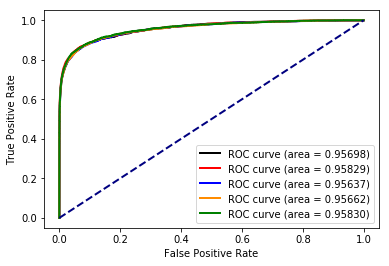

In [65]:
plt.figure()
lw = 2
colors = ['black','red','blue','darkorange','green']
for i in range(0,5):
    plt.plot(fprs_lgb[i], tprs_lgb[i], color=colors[i],
             lw=lw, label='ROC curve (area = %0.5f)' % scores_lgb[i][1])
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [66]:
scores_lgb

[(0.9820821175644137, 0.956977049226098),
 (0.9817518333788074, 0.9582931454864507),
 (0.9820871106486379, 0.9563734836217589),
 (0.9820437608462137, 0.9566219537028446),
 (0.9818506436276823, 0.9582963137710224)]

In [67]:
print('Mean AUC:', np.mean(scores_lgb,axis = 1))

Mean AUC: [0.96952958 0.97002249 0.9692303  0.96933286 0.97007348]


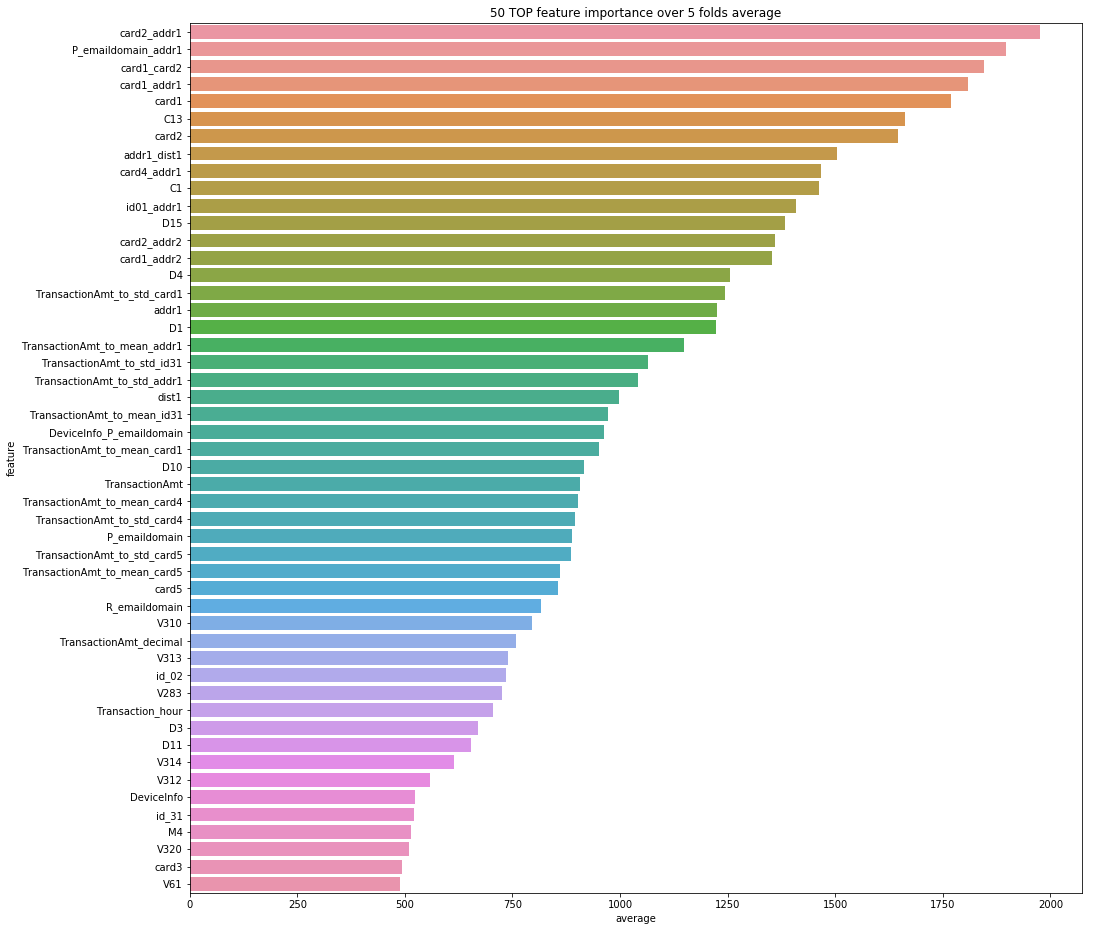

In [68]:
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(cv.n_splits)]].mean(axis=1)
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(cv.n_splits));

In [69]:
del train_data,target_data

In [70]:
#y_test = lgb_best.predict_proba(test_data)[:,1]

In [71]:
data = {'TransactionID':transactionID,'isFraud':predictions}
submissionDF = pd.DataFrame(data)
submissionDF.to_csv('sample_submission.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 